<a href="https://colab.research.google.com/github/Alejandro-Murcia/TDA_ClimateAI_Equipo3/blob/main/RetoMapperCadena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías

In [ ]:
pip install kmapper

In [ ]:
import pandas as pd
import kmapper as km
from kmapper.jupyter import display
import sklearn
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Bases de Datos

Las presentes bases de datos se obtuvieron de: https://www.ncei.noaa.gov/access/monitoring/enso/

Las variables utilizadas son:


*   **SOI** (Southern Oscillation Index)
*   **ONI** (Oceanic Niño Index)
*   **SST** (Sea Surface Temperature)
*   **OLR** (Outgoing Longwave Radiation)


In [ ]:
soiAnom = pd.read_csv("/content/gdrive/MyDrive/soiAnomaly.csv")
soiStd = pd.read_csv("/content/gdrive/MyDrive/soiStandardized.csv")

ONI =  pd.read_csv("/content/gdrive/MyDrive/ONI.csv")

sst = pd.read_csv("/content/gdrive/MyDrive/sst.csv")

olrOg = pd.read_csv("/content/gdrive/MyDrive/olrOriginal.csv")
olrStd = pd.read_csv("/content/gdrive/MyDrive/olrStandardized.csv")
olrAnom = pd.read_csv("/content/gdrive/MyDrive/olrAnomaly.csv")

In [ ]:
month_to_number = {
    "JAN":1, 
                 "FEB":2, 
                 "MAR":3,
                 "APR":4,
                 "MAY":5,
                 "JUN":6,
                 "JUL":7,
                 "AUG":8,
                 "SEP":9,
                 "OCT":10,
                 "NOV":11,
                 "DEC":12
                }
SEAS_to_mon = {
    "NDJ":1, 
                 "DJF":2, 
                 "JFM":3,
                 "FMA":4,
                 "MAM":5,
                 "AMJ":6,
                 "MJJ":7,
                 "JJA":8,
                 "JAS":9,
                 "ASO":10,
                 "SON":11,
                 "OND":12
                }

In [ ]:
def dfPreparation(df):
  df= df.melt(id_vars="YEAR",var_name="MON",value_name='value',)
  df['MON'] = pd.Categorical(df['MON'],categories=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'],ordered=True)
  df=  df.sort_values(["YEAR","MON"])
  df["MON"] = df['MON'].map(month_to_number)
  return df

In [ ]:
soiAnom = dfPreparation(soiAnom)
soiStd = dfPreparation(soiStd)

SOI = pd.merge(soiAnom, soiStd, on = ["YEAR", "MON"])
SOI.rename(columns = {'value_x':'SOI_Anomalias','value_y':'SOI_Estandarizada'}, inplace = True)

olrOg = dfPreparation(olrOg)
olrStd = dfPreparation(olrStd)
olrAnom = dfPreparation(olrAnom)

olr1 = pd.merge(olrOg, olrStd, on = ["YEAR", "MON"])
OLR = pd.merge(olr1, olrAnom, on = ["YEAR", "MON"])
OLR.rename(columns = {'value_x':'OLR_Original','value_y':'OLR_Estandarizada','value':'OLR_Anomalias'}, inplace = True)

In [ ]:
ONI.loc[ONI.SEAS == 'NDJ', 'YR'] = ONI['YR'] + 1
ONI["MON"] = ONI['SEAS'].map(SEAS_to_mon)
ONI.rename(columns = {'YR':'YEAR', 'TOTAL':'TOTAL_ONI','ANOM':'ANOM_ONI'}, inplace = True)
ONI = ONI.drop(columns=['SEAS'])

In [ ]:
sst.rename(columns = {'YR':'YEAR'}, inplace = True)

In [ ]:
ENSO =  pd.merge(sst, SOI, on = ["YEAR", "MON"])
ENSO =  pd.merge(ENSO, OLR, on = ["YEAR", "MON"])
ENSO =  pd.merge(ENSO, ONI, on = ["YEAR", "MON"])
ENSO

,YEAR,MON,NINO1+2,ANOM.12,NINO3,ANOM.3,NINO4,ANOM.4,NINO3.4,ANOM3.4,SOI_Anomalias,SOI_Estandarizada,OLR_Original,OLR_Estandarizada,OLR_Anomalias,TOTAL_ONI,ANOM_ONI
0,1982,1,24.28,-0.24,25.84,0.17,28.01,-0.21,26.65,0.08,2.0,1.2,49.5,0.9,14.7,26.46,-0.08
1,1982,2,25.38,-0.72,26.26,-0.11,27.99,-0.11,26.54,-0.20,0.4,0.3,36.9,0.1,2.0,26.56,-0.05
2,1982,3,25.22,-1.38,26.92,-0.25,28.18,-0.05,27.09,-0.14,1.0,0.6,28.4,-0.6,-8.6,26.90,0.07
3,1982,4,24.57,-1.16,27.52,-0.05,28.61,0.10,27.83,0.02,0.1,0.1,37.1,0.0,-0.2,27.35,0.19
4,1982,5,24.00,-0.62,27.70,0.49,29.19,0.40,28.37,0.49,-0.6,-0.3,49.7,0.4,7.0,27.95,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,2022,12,22.54,-0.30,24.48,-0.78,27.71,-0.73,25.81,-0.84,3.5,2.1,63.3,1.7,26.2,25.76,-0.92
492,2023,1,24.27,-0.24,25.17,-0.50,27.62,-0.60,25.88,-0.69,2.3,1.4,63.3,1.8,28.5,25.80,-0.82
493,2023,2,26.80,0.71,26.25,-0.13,27.58,-0.52,26.29,-0.44,2.3,1.4,56.9,1.4,22.0,25.97,-0.67
494,2023,3,28.12,1.52,27.52,0.36,28.09,-0.14,27.23,-0.01,0.3,0.2,58.7,1.4,21.7,26.44,-0.43


En este análisis no se utilizarán datos de las regiones 1 o 2 del Niño por lo que se eliminaron las variables relacionadas con estas; además, debido a que las diferentes columnas de SOI y OLR tienen una correlación muy alta solo se utilizó una columna relacionada a estas variables.

In [ ]:
ENSO1 = ENSO.drop(columns=['NINO1+2', 'ANOM.12','SOI_Estandarizada','OLR_Original','OLR_Estandarizada'])
ENSO1

,YEAR,MON,NINO3,ANOM.3,NINO4,ANOM.4,NINO3.4,ANOM3.4,SOI_Anomalias,OLR_Anomalias,TOTAL_ONI,ANOM_ONI
0,1982,1,25.84,0.17,28.01,-0.21,26.65,0.08,2.0,14.7,26.46,-0.08
1,1982,2,26.26,-0.11,27.99,-0.11,26.54,-0.20,0.4,2.0,26.56,-0.05
2,1982,3,26.92,-0.25,28.18,-0.05,27.09,-0.14,1.0,-8.6,26.90,0.07
3,1982,4,27.52,-0.05,28.61,0.10,27.83,0.02,0.1,-0.2,27.35,0.19
4,1982,5,27.70,0.49,29.19,0.40,28.37,0.49,-0.6,7.0,27.95,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...
491,2022,12,24.48,-0.78,27.71,-0.73,25.81,-0.84,3.5,26.2,25.76,-0.92
492,2023,1,25.17,-0.50,27.62,-0.60,25.88,-0.69,2.3,28.5,25.80,-0.82
493,2023,2,26.25,-0.13,27.58,-0.52,26.29,-0.44,2.3,22.0,25.97,-0.67
494,2023,3,27.52,0.36,28.09,-0.14,27.23,-0.01,0.3,21.7,26.44,-0.43


# Mapper

In [ ]:
fecha = ENSO1['YEAR'].astype(str) + '-' + ENSO1['MON'].astype(str)

In [ ]:
color = []
for i in ENSO1["ANOM_ONI"]:
  if i > 0.5:
    color.append(1)
  elif i < -0.5:
    color.append(-1)
  else:
    color.append(0)

In [ ]:
data = ENSO1.to_numpy()
data = np.delete(data, 0, axis=1)
data = np.delete(data, 0, axis=1)
data

array([[25.84, 0.17, 28.01, ..., 14.7, 26.46, -0.08],
       [26.26, -0.11, 27.99, ..., 2.0, 26.56, -0.05],
       [26.92, -0.25, 28.18, ..., -8.6, 26.9, 0.07],
       ...,
       [26.25, -0.13, 27.58, ..., 22.0, 25.97, -0.67],
       [27.52, 0.36, 28.09, ..., 21.7, 26.44, -0.43],
       [28.02, 0.44, 28.81, ..., 9.9, 27.14, -0.16]], dtype=object)

In [ ]:
mapper = km.KeplerMapper(verbose=1)

KeplerMapper(verbose=1)


In [ ]:
projected_data = mapper.fit_transform(data, projection=[9])

..Composing projection pipeline of length 1:
	Projections: [9]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (496, 10)

..Projecting data using: [9]

..Scaling with: MinMaxScaler()



In [ ]:
cover = km.Cover(n_cubes = 4, perc_overlap = 0.2)

In [ ]:
graph = mapper.map(projected_data, data, cover=cover,clusterer=KMeans(n_clusters=3))

Mapping on data shaped (496, 10) using lens shaped (496, 1)

Creating 4 hypercubes.

Created 12 edges and 12 nodes in 0:00:00.128427.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
graph['meta_data']

{'projection': '[9]',
 'n_cubes': 4,
 'perc_overlap': 0.2,
 'clusterer': 'KMeans(n_clusters=3)',
 'scaler': 'MinMaxScaler()'}

In [ ]:
fileID = 'projection=' + graph['meta_data']['projection'].split('(')[0] + '_' + \
'n_cubes=' + str(graph['meta_data']['n_cubes']) + '_' + \
'perc_overlap=' + str(graph['meta_data']['perc_overlap']) + '_' + \
'clusterer=' + graph['meta_data']['clusterer'].split('(')[0] + '_' + \
'scaler=' + graph['meta_data']['scaler'].split('(')[0]

In [ ]:
mapper.visualize(graph, 
                title=fileID,
                custom_tooltips = fecha,
                color_values = color,
                color_function_name = 'Fenomeno, Niño, Niña o Ninguno',
                node_color_function=np.array(['average','std','sum','max','min']))

km.jupyter.display("mapper" + fileID + ".html")

Wrote visualization to: mapper_visualization_output.html


/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [ ]:
list(graph['nodes'].keys())

['cube0_cluster0',
 'cube0_cluster1',
 'cube0_cluster2',
 'cube1_cluster0',
 'cube1_cluster1',
 'cube1_cluster2',
 'cube2_cluster0',
 'cube2_cluster1',
 'cube2_cluster2',
 'cube3_cluster0',
 'cube3_cluster1',
 'cube3_cluster2']

In [ ]:
NA1 = ENSO1.iloc[graph['nodes']['cube0_cluster0']]
NA1.describe().round(2)

,YEAR,NINO3,ANOM.3,NINO4,ANOM.4,NINO3.4,ANOM3.4,SOI_Anomalias,OLR_Anomalias,TOTAL_ONI,ANOM_ONI
count,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00
mean,2007.53,25.24,-0.86,27.30,-0.97,25.75,-1.06,2.43,27.27,25.47,-1.23
std,12.10,1.00,0.43,0.44,0.42,0.60,0.43,1.14,3.67,0.45,0.35
min,1984.00,23.44,-1.82,26.36,-1.86,24.56,-2.01,0.30,22.00,24.63,-1.85
25%,1999.00,24.46,-1.10,27.03,-1.26,25.35,-1.45,1.80,24.55,25.06,-1.58
50%,2010.00,25.22,-0.84,27.31,-0.92,25.78,-0.96,2.35,27.00,25.56,-1.19
75%,2020.25,26.26,-0.51,27.63,-0.64,26.21,-0.77,3.00,28.62,25.76,-0.93
max,2023.00,26.82,0.03,28.02,-0.20,26.85,-0.16,4.80,36.00,26.62,-0.60


In [ ]:
NA2 = ENSO1.iloc[graph['nodes']['cube0_cluster1']]
NA2.describe().round(2)

,YEAR,NINO3,ANOM.3,NINO4,ANOM.4,NINO3.4,ANOM3.4,SOI_Anomalias,OLR_Anomalias,TOTAL_ONI,ANOM_ONI
count,29.00,29.00,29.00,29.00,29.00,29.00,29.00,29.00,29.00,29.00,29.00
mean,2001.48,25.64,-0.74,27.83,-0.73,26.42,-0.85,0.96,5.18,26.28,-0.84
std,11.91,1.16,0.46,0.42,0.34,0.76,0.38,1.12,4.41,0.56,0.23
min,1983.00,23.66,-1.54,26.78,-1.44,24.97,-1.59,-0.80,-11.00,25.02,-1.60
25%,1989.00,24.44,-1.03,27.57,-0.99,25.92,-1.08,0.20,2.50,25.88,-0.92
50%,2001.00,26.11,-0.80,27.96,-0.74,26.49,-0.86,0.80,5.80,26.42,-0.81
75%,2009.00,26.52,-0.43,28.10,-0.52,27.03,-0.57,1.70,8.40,26.71,-0.66
max,2021.00,27.53,0.25,28.73,-0.06,27.65,-0.16,3.00,10.80,27.04,-0.59


In [ ]:
NA3 = ENSO1.iloc[graph['nodes']['cube0_cluster2']]
NA3.describe().round(2)

,YEAR,NINO3,ANOM.3,NINO4,ANOM.4,NINO3.4,ANOM3.4,SOI_Anomalias,OLR_Anomalias,TOTAL_ONI,ANOM_ONI
count,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00
mean,2005.32,24.96,-0.88,27.71,-0.85,26.00,-1.01,1.48,16.04,25.95,-0.99
std,12.02,1.13,0.43,0.40,0.37,0.60,0.36,1.10,2.92,0.47,0.24
min,1983.00,23.38,-2.16,26.62,-1.87,24.60,-2.22,-0.80,10.90,25.07,-1.56
25%,1998.00,24.18,-1.12,27.48,-1.08,25.63,-1.19,0.70,13.70,25.65,-1.11
50%,2007.00,24.48,-0.88,27.76,-0.84,25.83,-0.93,1.60,16.20,25.88,-0.98
75%,2016.00,25.91,-0.62,27.99,-0.57,26.57,-0.77,2.30,18.50,26.15,-0.79
max,2022.00,27.38,-0.03,28.56,0.05,27.31,-0.33,3.70,21.30,27.00,-0.63


In [ ]:
NO1 = ENSO1.iloc[graph['nodes']['cube3_cluster0']]
NO1.describe().round(2)

,YEAR,NINO3,ANOM.3,NINO4,ANOM.4,NINO3.4,ANOM3.4,SOI_Anomalias,OLR_Anomalias,TOTAL_ONI,ANOM_ONI
count,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00
mean,2001.95,27.61,1.93,29.23,0.76,28.64,1.81,-2.55,-28.99,28.74,1.94
std,12.94,0.65,0.73,0.39,0.42,0.38,0.46,1.34,6.08,0.36,0.40
min,1982.00,26.28,0.71,28.63,0.18,27.92,1.00,-5.80,-41.40,28.14,1.48
25%,1992.00,27.10,1.18,28.99,0.43,28.50,1.61,-3.20,-32.70,28.52,1.56
50%,1997.00,27.54,2.09,29.11,0.60,28.60,1.73,-2.40,-25.80,28.81,1.90
75%,2015.00,28.16,2.52,29.46,1.16,28.85,2.13,-1.70,-24.10,29.01,2.23
max,2016.00,28.69,3.07,30.22,1.55,29.54,2.72,-0.10,-21.10,29.26,2.64


In [ ]:
NO2 = ENSO1.iloc[graph['nodes']['cube3_cluster1']]
NO2.describe().round(2)

,YEAR,NINO3,ANOM.3,NINO4,ANOM.4,NINO3.4,ANOM3.4,SOI_Anomalias,OLR_Anomalias,TOTAL_ONI,ANOM_ONI
count,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00
mean,1992.70,27.56,1.74,28.96,0.53,28.39,1.56,-2.53,-12.22,28.63,1.94
std,10.13,1.07,0.92,0.32,0.14,0.44,0.50,1.83,4.58,0.34,0.35
min,1982.00,25.93,0.70,28.51,0.33,27.67,0.85,-6.00,-20.10,28.03,1.48
25%,1987.00,26.62,0.90,28.69,0.42,28.13,1.06,-3.62,-14.35,28.40,1.66
50%,1989.50,28.15,1.69,28.91,0.56,28.50,1.64,-2.00,-10.60,28.74,1.94
75%,1997.75,28.36,2.61,29.28,0.63,28.74,1.98,-1.55,-10.12,28.88,2.22
max,2016.00,28.57,3.04,29.31,0.75,28.93,2.21,0.00,-4.70,29.01,2.39


In [ ]:
NO3 = ENSO1.iloc[graph['nodes']['cube3_cluster2']]
NO3.describe().round(2)

,YEAR,NINO3,ANOM.3,NINO4,ANOM.4,NINO3.4,ANOM3.4,SOI_Anomalias,OLR_Anomalias,TOTAL_ONI,ANOM_ONI
count,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00
mean,1990.50,28.70,1.34,28.49,0.12,28.42,0.90,-2.98,6.15,28.73,1.71
std,8.66,0.15,0.21,0.08,0.23,0.08,0.36,1.24,6.82,0.04,0.25
min,1983.00,28.48,1.19,28.39,-0.12,28.30,0.50,-4.00,1.00,28.68,1.44
25%,1983.00,28.69,1.20,28.46,-0.04,28.39,0.64,-4.00,1.90,28.70,1.52
50%,1990.50,28.76,1.26,28.49,0.12,28.44,0.93,-3.20,3.80,28.73,1.73
75%,1998.00,28.78,1.40,28.52,0.30,28.46,1.19,-2.17,8.05,28.76,1.92
max,1998.00,28.81,1.64,28.59,0.37,28.49,1.22,-1.50,16.00,28.78,1.93


In [ ]:
NomNA1 = ENSO1.iloc[graph['nodes']['cube1_cluster0']]
NomNA1.describe().round(2)

,YEAR,NINO3,ANOM.3,NINO4,ANOM.4,NINO3.4,ANOM3.4,SOI_Anomalias,OLR_Anomalias,TOTAL_ONI,ANOM_ONI
count,149.0,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00
mean,2001.4,25.81,-0.25,28.56,-0.09,27.02,-0.20,0.24,2.13,27.07,-0.11
std,11.6,1.02,0.49,0.47,0.45,0.65,0.44,1.01,3.66,0.56,0.37
min,1982.0,23.99,-1.29,27.37,-1.14,25.52,-1.30,-2.20,-5.60,25.73,-0.85
25%,1991.0,25.02,-0.61,28.14,-0.45,26.52,-0.54,-0.50,-0.80,26.71,-0.40
50%,2003.0,25.75,-0.23,28.60,-0.08,27.08,-0.19,0.20,2.30,27.08,-0.12
75%,2012.0,26.63,0.10,28.94,0.21,27.45,0.12,0.70,5.40,27.47,0.22
max,2021.0,28.13,0.88,29.56,0.88,28.37,0.86,2.90,8.10,28.22,0.53


In [ ]:
NomNA2 = ENSO1.iloc[graph['nodes']['cube1_cluster1']]
NomNA2.describe().round(2)

,YEAR,NINO3,ANOM.3,NINO4,ANOM.4,NINO3.4,ANOM3.4,SOI_Anomalias,OLR_Anomalias,TOTAL_ONI,ANOM_ONI
count,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00
mean,2007.57,25.70,-0.41,28.17,-0.38,26.66,-0.47,1.00,13.94,26.60,-0.47
std,11.95,1.09,0.41,0.49,0.37,0.66,0.36,1.00,4.93,0.59,0.28
min,1982.00,24.05,-1.67,27.10,-1.16,25.59,-1.32,-1.70,8.10,25.77,-0.86
25%,2000.00,24.69,-0.68,27.79,-0.65,26.18,-0.70,0.30,10.12,26.09,-0.70
50%,2010.00,25.52,-0.43,28.19,-0.36,26.57,-0.50,1.20,12.55,26.47,-0.49
75%,2017.00,26.58,-0.13,28.54,-0.14,27.12,-0.26,1.58,16.50,26.98,-0.31
max,2023.00,28.02,0.53,29.28,0.53,28.22,0.41,3.10,29.90,28.13,0.40


In [ ]:
NomNA3 = ENSO1.iloc[graph['nodes']['cube1_cluster2']]
NomNA3.describe().round(2)

,YEAR,NINO3,ANOM.3,NINO4,ANOM.4,NINO3.4,ANOM3.4,SOI_Anomalias,OLR_Anomalias,TOTAL_ONI,ANOM_ONI
count,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00
mean,1999.00,26.13,0.01,28.69,0.18,27.19,0.10,-0.61,-13.51,27.15,0.15
std,9.33,1.03,0.41,0.41,0.33,0.56,0.34,1.07,6.44,0.52,0.30
min,1982.00,24.35,-0.96,27.23,-0.99,26.11,-0.89,-3.00,-31.90,25.98,-0.85
25%,1991.25,25.25,-0.24,28.37,0.06,26.79,-0.09,-1.35,-16.35,26.78,-0.07
50%,1997.00,26.10,-0.02,28.75,0.15,27.08,0.14,-0.70,-11.50,27.14,0.24
75%,2005.00,27.07,0.22,29.00,0.32,27.59,0.33,0.20,-8.52,27.61,0.38
max,2020.00,28.33,0.93,29.62,1.10,28.63,0.82,1.80,-6.00,28.18,0.53


In [ ]:
NomNO1 = ENSO1.iloc[graph['nodes']['cube2_cluster0']]
NomNO1.describe().round(2)

,YEAR,NINO3,ANOM.3,NINO4,ANOM.4,NINO3.4,ANOM3.4,SOI_Anomalias,OLR_Anomalias,TOTAL_ONI,ANOM_ONI
count,63.00,63.00,63.00,63.00,63.00,63.00,63.00,63.00,63.00,63.00,63.00
mean,1999.08,26.42,0.44,29.00,0.43,27.58,0.49,-0.73,-12.12,27.70,0.67
std,11.76,1.02,0.45,0.34,0.31,0.56,0.33,0.97,4.06,0.52,0.33
min,1982.00,24.84,-0.36,28.29,-0.32,26.73,-0.33,-2.60,-20.20,26.89,0.26
25%,1990.00,25.64,0.10,28.79,0.17,27.16,0.25,-1.25,-15.50,27.33,0.42
50%,1994.00,26.17,0.47,29.01,0.39,27.46,0.52,-0.70,-11.40,27.59,0.64
75%,2007.50,27.14,0.76,29.28,0.63,27.80,0.70,-0.10,-8.65,28.10,0.79
max,2020.00,28.64,1.71,29.68,1.10,28.79,1.26,1.30,-6.00,28.88,1.65


In [ ]:
NomNO2 = ENSO1.iloc[graph['nodes']['cube2_cluster1']]
NomNO2.describe().round(2)

,YEAR,NINO3,ANOM.3,NINO4,ANOM.4,NINO3.4,ANOM3.4,SOI_Anomalias,OLR_Anomalias,TOTAL_ONI,ANOM_ONI
count,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00
mean,2003.69,26.48,0.24,29.02,0.40,27.60,0.33,-0.08,0.56,27.69,0.53
std,11.25,0.92,0.45,0.36,0.36,0.49,0.36,1.10,4.64,0.47,0.27
min,1982.00,24.91,-0.82,28.15,-0.49,26.46,-0.75,-2.40,-5.50,26.95,0.26
25%,1994.25,25.83,-0.10,28.76,0.21,27.27,0.12,-0.88,-2.98,27.30,0.35
50%,2004.00,26.41,0.25,29.05,0.41,27.56,0.39,-0.15,-0.35,27.66,0.45
75%,2014.00,27.09,0.53,29.26,0.68,27.98,0.59,0.60,2.88,28.04,0.65
max,2020.00,28.77,1.20,29.84,1.17,28.49,1.43,2.00,16.00,28.71,1.54


In [ ]:
NomNO3 = ENSO1.iloc[graph['nodes']['cube2_cluster2']]
NomNO3.describe().round(2)

,YEAR,NINO3,ANOM.3,NINO4,ANOM.4,NINO3.4,ANOM3.4,SOI_Anomalias,OLR_Anomalias,TOTAL_ONI,ANOM_ONI
count,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00
mean,1996.93,26.86,0.89,29.02,0.52,27.99,0.98,-1.82,-28.62,28.03,1.09
std,10.11,0.81,0.48,0.30,0.31,0.46,0.41,1.07,5.96,0.45,0.34
min,1982.00,25.53,-0.13,28.41,-0.08,26.97,0.15,-5.20,-44.00,27.22,0.28
25%,1988.00,26.26,0.66,28.81,0.32,27.63,0.75,-2.38,-33.38,27.74,0.81
50%,1994.00,26.78,0.80,29.04,0.54,28.02,0.92,-1.80,-27.90,27.96,1.14
75%,2002.75,27.62,1.07,29.21,0.72,28.34,1.20,-1.10,-23.08,28.37,1.31
max,2019.00,28.46,2.32,29.74,1.17,28.81,1.73,0.40,-20.50,28.88,1.63


Después de analizar las estadísticas de los elementos que conforman a los distintos nodos se observó que los nodos fueron clasificados de acuerdo tres distintos OLR para cada uno de las tres partes del fenómeno ENSO (La Niña, Normalidad, El Niño).

# Cadena de Markov

Se construyó una cadena de Markov con 10 estados, cada estado es un intervalo de valores de la columna de Anomalías de ONI que es la variable que indica si está ocurriendo un fenómeno del Niño, la Niña o ninguno. Los intervalos son de 0.5 grados Centígrados.

Las probabilidades se calcularon contando la cantidad de registros que había en un intervalo determinado y luego contar en que intervalo caían los siguientes registros para después dividir estas cantidades y obtener las probabilidades de transición.

In [ ]:
# Estados de la cadena

#/-----------La Niña-----------\ /---Normal---\ /-------El Niño-------\
#<-2, -2/-1.5, -1.5/-1, -1/-0.5, -0.5/0, 0/0.5, 0.5/1, 1/1.5, 1.5/2, >2

In [ ]:
# Fila de -2
empiezaMenos2 = 0

p_menos2a_menos2 = 0
p_menos2a_menos2_1_5=0
p_menos2a_menos1_5_1=0
p_menos2a_menos1_0_5=0
p_menos2a_menos0_50=0
p_menos2a_00_5=0
p_menos2a_0_51=0
p_menos2a_1_1_5=0
p_menos2a_1_5_2=0
p_menos2a_mayor2=0

#Fila de -2 a -1.5
empiezaMenos2_15 = 0

p_menos2_1_5_menos2 = 0
p_menos2_1_5_menos2_1_5=0
p_menos2_1_5_menos1_5_1=0
p_menos2_1_5_menos1_0_5=0
p_menos2_1_5_menos0_50=0
p_menos2_1_5_00_5=0
p_menos2_1_5_0_51=0
p_menos2_1_5_1_1_5=0
p_menos2_1_5_1_5_2=0
p_menos2_1_5_mayor2=0

#Fila de -1.5 a -1
empiezaMenos15_1 = 0

p_menos1_5_1_menos2 = 0
p_menos1_5_1_menos2_1_5=0
p_menos1_5_1_menos1_5_1=0
p_menos1_5_1_menos1_0_5=0
p_menos1_5_1_menos0_50=0
p_menos1_5_1_00_5=0
p_menos1_5_1_0_51=0
p_menos1_5_1_1_1_5=0
p_menos1_5_1_1_5_2=0
p_menos1_5_1_mayor2=0

#Fila de -1 a -0.5
empiezaMenos1_05 = 0

p_menos1_0_5_menos2 = 0
p_menos1_0_5_menos2_1_5=0
p_menos1_0_5_menos1_5_1=0
p_menos1_0_5_menos1_0_5=0
p_menos1_0_5_menos0_50=0
p_menos1_0_5_00_5=0
p_menos1_0_5_0_51=0
p_menos1_0_5_1_1_5=0
p_menos1_0_5_1_5_2=0
p_menos1_0_5_mayor2=0

#Fila de -0.5 a 0
empiezaMenos05_0 = 0

p_menos0_50_menos2 = 0
p_menos0_50_menos2_1_5=0
p_menos0_50_menos1_5_1=0
p_menos0_50_menos1_0_5=0
p_menos0_50_menos0_50=0
p_menos0_50_00_5=0
p_menos0_50_0_51=0
p_menos0_50_1_1_5=0
p_menos0_50_1_5_2=0
p_menos0_50_mayor2=0

#Fila de 0 a 0.5
empieza0_05 = 0

p_00_5_menos2 = 0
p_00_5_menos2_1_5=0
p_00_5_menos1_5_1=0
p_00_5_menos1_0_5=0
p_00_5_menos0_50=0
p_00_5_00_5=0
p_00_5_0_51=0
p_00_5_1_1_5=0
p_00_5_1_5_2=0
p_00_5_mayor2=0

#Fila de 0.5 a 1
empieza05_1 = 0

p_0_51_menos2 = 0
p_0_51_menos2_1_5=0
p_0_51_menos1_5_1=0
p_0_51_menos1_0_5=0
p_0_51_menos0_50=0
p_0_51_00_5=0
p_0_51_0_51=0
p_0_51_1_1_5=0
p_0_51_1_5_2=0
p_0_51_mayor2=0

#Fila de 1 a 1.5
empieza1_15 = 0

p_1_1_5_menos2 = 0
p_1_1_5_menos2_1_5=0
p_1_1_5_menos1_5_1=0
p_1_1_5_menos1_0_5=0
p_1_1_5_menos0_50=0
p_1_1_5_00_5=0
p_1_1_5_0_51=0
p_1_1_5_1_1_5=0
p_1_1_5_1_5_2=0
p_1_1_5_mayor2=0

#Fila de 1.5 a 2
empieza15_2 = 0

p_1_5_2_menos2 = 0
p_1_5_2_menos2_1_5=0
p_1_5_2_menos1_5_1=0
p_1_5_2_menos1_0_5=0
p_1_5_2_menos0_50=0
p_1_5_2_00_5=0
p_1_5_2_0_51=0
p_1_5_2_1_1_5=0
p_1_5_2_1_5_2=0
p_1_5_2_mayor2=0

#Fila de <2
empiezaMayor2= 0

p_mayor2_menos2 = 0
p_mayor2_menos2_1_5=0
p_mayor2_menos1_5_1=0
p_mayor2_menos1_0_5=0
p_mayor2_menos0_50=0
p_mayor2_00_5=0
p_mayor2_0_51=0
p_mayor2_1_1_5=0
p_mayor2_1_5_2=0
p_mayor2_mayor2=0

anomONI = len(ONI)

for i in range(anomONI-1):
  if ONI["ANOM_ONI"][i] <-2 and ONI["ANOM_ONI"][i+1] < -2:
    p_menos2a_menos2 += 1
    empiezaMenos2 += 1
  elif ONI["ANOM_ONI"][i] < -2 and (ONI["ANOM_ONI"][i+1] >= -2 and ONI["ANOM_ONI"][i+1] < -1.5):
    p_menos2a_menos2_1_5 += 1
    empiezaMenos2 += 1
  elif ONI["ANOM_ONI"][i] < -2 and (ONI["ANOM_ONI"][i+1] >= -1.5 and ONI["ANOM_ONI"][i+1] < -1):
    p_menos2a_menos1_5_1 += 1
    empiezaMenos2 += 1
  elif ONI["ANOM_ONI"][i] < -2 and (ONI["ANOM_ONI"][i+1] >= -1 and ONI["ANOM_ONI"][i+1] < -0.5):
    p_menos2a_menos1_0_5 += 1
    empiezaMenos2 += 1
  elif ONI["ANOM_ONI"][i] < -2 and (ONI["ANOM_ONI"][i+1] >= -0.5 and ONI["ANOM_ONI"][i+1] < 0):
    p_menos2a_menos0_50 += 1
    empiezaMenos2 += 1
  elif ONI["ANOM_ONI"][i] < -2 and (ONI["ANOM_ONI"][i+1] >= 0 and ONI["ANOM_ONI"][i+1] < 0.5):
    p_menos2a_00_5 += 1
    empiezaMenos2 += 1
  elif ONI["ANOM_ONI"][i] < -2 and (ONI["ANOM_ONI"][i+1] >= 0.5 and ONI["ANOM_ONI"][i+1] < 1):
    p_menos2a_0_51 += 1
    empiezaMenos2 += 1
  elif ONI["ANOM_ONI"][i] < -2 and (ONI["ANOM_ONI"][i+1] >= 1 and ONI["ANOM_ONI"][i+1] < 1.5):
    p_menos2a_1_1_5 += 1
    empiezaMenos2 += 1
  elif ONI["ANOM_ONI"][i] < -2 and (ONI["ANOM_ONI"][i+1] >= 1.5 and ONI["ANOM_ONI"][i+1] < 2):
    p_menos2a_1_5_2 += 1
    empiezaMenos2 += 1
  elif ONI["ANOM_ONI"][i] < -2 and (ONI["ANOM_ONI"][i+1] >= 2):
    p_menos2a_mayor2 += 1
    empiezaMenos2 += 1
  #
  elif (ONI["ANOM_ONI"][i] >=-2 and ONI["ANOM_ONI"][i] <-1.5) and ONI["ANOM_ONI"][i+1] < -2:
    p_menos2_1_5_menos2 += 1
    empiezaMenos2_15 +=1
  elif (ONI["ANOM_ONI"][i] >=-2 and ONI["ANOM_ONI"][i] <-1.5) and (ONI["ANOM_ONI"][i+1] >= -2 and ONI["ANOM_ONI"][i+1] < -1.5):
    p_menos2_1_5_menos2_1_5 += 1
    empiezaMenos2_15 +=1
  elif (ONI["ANOM_ONI"][i] >=-2 and ONI["ANOM_ONI"][i] <-1.5) and (ONI["ANOM_ONI"][i+1] >= -1.5 and ONI["ANOM_ONI"][i+1] < -1):
    p_menos2_1_5_menos1_5_1 += 1
    empiezaMenos2_15 +=1
  elif (ONI["ANOM_ONI"][i] >=-2 and ONI["ANOM_ONI"][i] <-1.5) and (ONI["ANOM_ONI"][i+1] >= -1 and ONI["ANOM_ONI"][i+1] < -0.5):
    p_menos2_1_5_menos1_0_5 += 1
    empiezaMenos2_15 +=1
  elif (ONI["ANOM_ONI"][i] >=-2 and ONI["ANOM_ONI"][i] <-1.5) and (ONI["ANOM_ONI"][i+1] >= -0.5 and ONI["ANOM_ONI"][i+1] < 0):
    p_menos2_1_5_menos0_50 += 1
    empiezaMenos2_15 +=1
  elif (ONI["ANOM_ONI"][i] >=-2 and ONI["ANOM_ONI"][i] <-1.5) and (ONI["ANOM_ONI"][i+1] >= 0 and ONI["ANOM_ONI"][i+1] < 0.5):
    p_menos2_1_5_00_5 += 1
    empiezaMenos2_15 +=1
  elif (ONI["ANOM_ONI"][i] >=-2 and ONI["ANOM_ONI"][i] <-1.5) and (ONI["ANOM_ONI"][i+1] >= 0.5 and ONI["ANOM_ONI"][i+1] < 1):
    p_menos2_1_5_0_51 += 1
    empiezaMenos2_15 +=1
  elif (ONI["ANOM_ONI"][i] >=-2 and ONI["ANOM_ONI"][i] <-1.5) and (ONI["ANOM_ONI"][i+1] >= 1 and ONI["ANOM_ONI"][i+1] < 1.5):
    p_menos2_1_5_1_1_5 += 1
    empiezaMenos2_15 +=1
  elif (ONI["ANOM_ONI"][i] >=-2 and ONI["ANOM_ONI"][i] <-1.5) and (ONI["ANOM_ONI"][i+1] >= 1.5 and ONI["ANOM_ONI"][i+1] < 2):
    p_menos2_1_5_1_5_2 += 1
    empiezaMenos2_15 +=1
  elif (ONI["ANOM_ONI"][i] >=-2 and ONI["ANOM_ONI"][i] <-1.5) and (ONI["ANOM_ONI"][i+1] >= 2):
    p_menos2_1_5_mayor2 += 1
    empiezaMenos2_15 +=1
  #
  elif (ONI["ANOM_ONI"][i] >= -1.5 and ONI["ANOM_ONI"][i] < -1) and ONI["ANOM_ONI"][i+1] < -2:
    p_menos1_5_1_menos2 += 1
    empiezaMenos15_1 += 1
  elif (ONI["ANOM_ONI"][i] >= -1.5 and ONI["ANOM_ONI"][i] < -1) and (ONI["ANOM_ONI"][i+1] >= -2 and ONI["ANOM_ONI"][i+1] < -1.5):
    p_menos1_5_1_menos2_1_5 += 1
    empiezaMenos15_1 += 1
  elif (ONI["ANOM_ONI"][i] >= -1.5 and ONI["ANOM_ONI"][i] < -1) and (ONI["ANOM_ONI"][i+1] >= -1.5 and ONI["ANOM_ONI"][i+1] < -1):
    p_menos1_5_1_menos1_5_1 += 1
    empiezaMenos15_1 += 1
  elif (ONI["ANOM_ONI"][i] >= -1.5 and ONI["ANOM_ONI"][i] < -1) and (ONI["ANOM_ONI"][i+1] >= -1 and ONI["ANOM_ONI"][i+1] < -0.5):
    p_menos1_5_1_menos1_0_5 += 1
    empiezaMenos15_1 += 1
  elif (ONI["ANOM_ONI"][i] >= -1.5 and ONI["ANOM_ONI"][i] < -1) and (ONI["ANOM_ONI"][i+1] >= -0.5 and ONI["ANOM_ONI"][i+1] < 0):
    p_menos1_5_1_menos0_50 += 1
    empiezaMenos15_1 += 1
  elif (ONI["ANOM_ONI"][i] >= -1.5 and ONI["ANOM_ONI"][i] < -1) and (ONI["ANOM_ONI"][i+1] >= 0 and ONI["ANOM_ONI"][i+1] < 0.5):
    p_menos1_5_1_00_5 += 1
    empiezaMenos15_1 += 1
  elif (ONI["ANOM_ONI"][i] >= -1.5 and ONI["ANOM_ONI"][i] < -1) and (ONI["ANOM_ONI"][i+1] >= 0.5 and ONI["ANOM_ONI"][i+1] < 1):
    p_menos1_5_1_0_51 += 1
    empiezaMenos15_1 += 1
  elif (ONI["ANOM_ONI"][i] >= -1.5 and ONI["ANOM_ONI"][i] < -1) and (ONI["ANOM_ONI"][i+1] >= 1 and ONI["ANOM_ONI"][i+1] < 1.5):
    p_menos1_5_1_1_1_5 += 1
    empiezaMenos15_1 += 1
  elif (ONI["ANOM_ONI"][i] >= -1.5 and ONI["ANOM_ONI"][i] < -1) and (ONI["ANOM_ONI"][i+1] >= 1.5 and ONI["ANOM_ONI"][i+1] < 2):
    p_menos1_5_1_1_5_2 += 1
    empiezaMenos15_1 += 1
  elif (ONI["ANOM_ONI"][i] >= -1.5 and ONI["ANOM_ONI"][i] < -1) and (ONI["ANOM_ONI"][i+1] >= 2):
    p_menos1_5_1_mayor2 += 1
    empiezaMenos15_1 += 1
  #
  elif (ONI["ANOM_ONI"][i] >= -1 and ONI["ANOM_ONI"][i] < -0.5) and ONI["ANOM_ONI"][i+1] < -2:
    p_menos1_0_5_menos2 += 1
    empiezaMenos1_05 += 1
  elif (ONI["ANOM_ONI"][i] >= -1 and ONI["ANOM_ONI"][i] < -0.5) and (ONI["ANOM_ONI"][i+1] >= -2 and ONI["ANOM_ONI"][i+1] < -1.5):
    p_menos1_0_5_menos2_1_5 += 1
    empiezaMenos1_05 += 1
  elif (ONI["ANOM_ONI"][i] >= -1 and ONI["ANOM_ONI"][i] < -0.5) and (ONI["ANOM_ONI"][i+1] >= -1.5 and ONI["ANOM_ONI"][i+1] < -1):
    p_menos1_0_5_menos1_5_1 += 1
    empiezaMenos1_05 += 1
  elif (ONI["ANOM_ONI"][i] >= -1 and ONI["ANOM_ONI"][i] < -0.5) and (ONI["ANOM_ONI"][i+1] >= -1 and ONI["ANOM_ONI"][i+1] < -0.5):
    p_menos1_0_5_menos1_0_5 += 1
    empiezaMenos1_05 += 1
  elif (ONI["ANOM_ONI"][i] >= -1 and ONI["ANOM_ONI"][i] < -0.5) and (ONI["ANOM_ONI"][i+1] >= -0.5 and ONI["ANOM_ONI"][i+1] < 0):
    p_menos1_0_5_menos0_50 += 1
    empiezaMenos1_05 += 1
  elif (ONI["ANOM_ONI"][i] >= -1 and ONI["ANOM_ONI"][i] < -0.5) and (ONI["ANOM_ONI"][i+1] >= 0 and ONI["ANOM_ONI"][i+1] < 0.5):
    p_menos1_0_5_00_5 += 1
    empiezaMenos1_05 += 1
  elif (ONI["ANOM_ONI"][i] >= -1 and ONI["ANOM_ONI"][i] < -0.5) and (ONI["ANOM_ONI"][i+1] >= 0.5 and ONI["ANOM_ONI"][i+1] < 1):
    p_menos1_0_5_0_51 += 1
    empiezaMenos1_05 += 1
  elif (ONI["ANOM_ONI"][i] >= -1 and ONI["ANOM_ONI"][i] < -0.5) and (ONI["ANOM_ONI"][i+1] >= 1 and ONI["ANOM_ONI"][i+1] < 1.5):
    p_menos1_0_5_1_1_5 += 1
    empiezaMenos1_05 += 1
  elif (ONI["ANOM_ONI"][i] >= -1 and ONI["ANOM_ONI"][i] < -0.5) and (ONI["ANOM_ONI"][i+1] >= 1.5 and ONI["ANOM_ONI"][i+1] < 2):
    p_menos1_0_5_1_5_2 += 1
    empiezaMenos1_05 += 1
  elif (ONI["ANOM_ONI"][i] >= -1 and ONI["ANOM_ONI"][i] < -0.5) and (ONI["ANOM_ONI"][i+1] >= 2):
    p_menos1_0_5_mayor2 += 1
    empiezaMenos1_05 += 1
  #
  elif (ONI["ANOM_ONI"][i] >= -0.5 and ONI["ANOM_ONI"][i] < 0) and ONI["ANOM_ONI"][i+1] < -2:
    p_menos0_50_menos2 += 1
    empiezaMenos05_0 += 1
  elif (ONI["ANOM_ONI"][i] >= -0.5 and ONI["ANOM_ONI"][i] < 0) and (ONI["ANOM_ONI"][i+1] >= -2 and ONI["ANOM_ONI"][i+1] < -1.5):
    p_menos0_50_menos2_1_5 += 1
    empiezaMenos05_0 += 1
  elif (ONI["ANOM_ONI"][i] >= -0.5 and ONI["ANOM_ONI"][i] < 0) and (ONI["ANOM_ONI"][i+1] >= -1.5 and ONI["ANOM_ONI"][i+1] < -1):
    p_menos0_50_menos1_5_1 += 1
    empiezaMenos05_0 += 1
  elif (ONI["ANOM_ONI"][i] >= -0.5 and ONI["ANOM_ONI"][i] < 0) and (ONI["ANOM_ONI"][i+1] >= -1 and ONI["ANOM_ONI"][i+1] < -0.5):
    p_menos0_50_menos1_0_5 += 1
    empiezaMenos05_0 += 1
  elif (ONI["ANOM_ONI"][i] >= -0.5 and ONI["ANOM_ONI"][i] < 0) and (ONI["ANOM_ONI"][i+1] >= -0.5 and ONI["ANOM_ONI"][i+1] < 0):
    p_menos0_50_menos0_50 += 1
    empiezaMenos05_0 += 1
  elif (ONI["ANOM_ONI"][i] >= -0.5 and ONI["ANOM_ONI"][i] < 0) and (ONI["ANOM_ONI"][i+1] >= 0 and ONI["ANOM_ONI"][i+1] < 0.5):
    p_menos0_50_00_5 += 1
    empiezaMenos05_0 += 1
  elif (ONI["ANOM_ONI"][i] >= -0.5 and ONI["ANOM_ONI"][i] < 0) and (ONI["ANOM_ONI"][i+1] >= 0.5 and ONI["ANOM_ONI"][i+1] < 1):
    p_menos0_50_0_51 += 1
    empiezaMenos05_0 += 1
  elif (ONI["ANOM_ONI"][i] >= -0.5 and ONI["ANOM_ONI"][i] < 0) and (ONI["ANOM_ONI"][i+1] >= 1 and ONI["ANOM_ONI"][i+1] < 1.5):
    p_menos0_50_1_1_5 += 1
    empiezaMenos05_0 += 1
  elif (ONI["ANOM_ONI"][i] >= -0.5 and ONI["ANOM_ONI"][i] < 0) and (ONI["ANOM_ONI"][i+1] >= 1.5 and ONI["ANOM_ONI"][i+1] < 2):
    p_menos0_50_1_5_2 += 1
    empiezaMenos05_0 += 1
  elif (ONI["ANOM_ONI"][i] >= -0.5 and ONI["ANOM_ONI"][i] < 0) and (ONI["ANOM_ONI"][i+1] >= 2):
    p_menos0_50_mayor2 += 1
    empiezaMenos05_0 += 1
  #
  elif (ONI["ANOM_ONI"][i] >= 0 and ONI["ANOM_ONI"][i] < 0.5) and ONI["ANOM_ONI"][i+1] < -2:
    p_00_5_menos2 += 1
    empieza0_05 += 1
  elif (ONI["ANOM_ONI"][i] >= 0 and ONI["ANOM_ONI"][i] < 0.5) and (ONI["ANOM_ONI"][i+1] >= -2 and ONI["ANOM_ONI"][i+1] < -1.5):
    p_00_5_menos2_1_5 += 1
    empieza0_05 += 1
  elif (ONI["ANOM_ONI"][i] >= 0 and ONI["ANOM_ONI"][i] < 0.5) and (ONI["ANOM_ONI"][i+1] >= -1.5 and ONI["ANOM_ONI"][i+1] < -1):
    p_00_5_menos1_5_1 += 1
    empieza0_05 += 1
  elif (ONI["ANOM_ONI"][i] >= 0 and ONI["ANOM_ONI"][i] < 0.5) and (ONI["ANOM_ONI"][i+1] >= -1 and ONI["ANOM_ONI"][i+1] < -0.5):
    p_00_5_menos1_0_5 += 1
    empieza0_05 += 1
  elif (ONI["ANOM_ONI"][i] >= 0 and ONI["ANOM_ONI"][i] < 0.5) and (ONI["ANOM_ONI"][i+1] >= -0.5 and ONI["ANOM_ONI"][i+1] < 0):
    p_00_5_menos0_50 += 1
    empieza0_05 += 1
  elif (ONI["ANOM_ONI"][i] >= 0 and ONI["ANOM_ONI"][i] < 0.5) and (ONI["ANOM_ONI"][i+1] >= 0 and ONI["ANOM_ONI"][i+1] < 0.5):
    p_00_5_00_5 += 1
    empieza0_05 += 1
  elif (ONI["ANOM_ONI"][i] >= 0 and ONI["ANOM_ONI"][i] < 0.5) and (ONI["ANOM_ONI"][i+1] >= 0.5 and ONI["ANOM_ONI"][i+1] < 1):
    p_00_5_0_51 += 1
    empieza0_05 += 1
  elif (ONI["ANOM_ONI"][i] >= 0 and ONI["ANOM_ONI"][i] < 0.5) and (ONI["ANOM_ONI"][i+1] >= 1 and ONI["ANOM_ONI"][i+1] < 1.5):
    p_00_5_1_1_5+= 1
    empieza0_05 += 1
  elif (ONI["ANOM_ONI"][i] >= 0 and ONI["ANOM_ONI"][i] < 0.5) and (ONI["ANOM_ONI"][i+1] >= 1.5 and ONI["ANOM_ONI"][i+1] < 2):
    p_00_5_1_5_2 += 1
    empieza0_05 += 1
  elif (ONI["ANOM_ONI"][i] >= 0 and ONI["ANOM_ONI"][i] < 0.5) and (ONI["ANOM_ONI"][i+1] >= 2):
    p_00_5_mayor2 += 1
    empieza0_05 += 1
    #
  elif (ONI["ANOM_ONI"][i] >= 0.5 and ONI["ANOM_ONI"][i] < 1) and ONI["ANOM_ONI"][i+1] < -2:
    p_0_51_menos2 += 1
    empieza05_1 += 1
  elif (ONI["ANOM_ONI"][i] >= 0.5 and ONI["ANOM_ONI"][i] < 1) and (ONI["ANOM_ONI"][i+1] >= -2 and ONI["ANOM_ONI"][i+1] < -1.5):
    p_0_51_menos2_1_5 += 1
    empieza05_1 += 1
  elif (ONI["ANOM_ONI"][i] >= 0.5 and ONI["ANOM_ONI"][i] < 1) and (ONI["ANOM_ONI"][i+1] >= -1.5 and ONI["ANOM_ONI"][i+1] < -1):
    p_0_51_menos1_5_1 += 1
    empieza05_1 += 1
  elif (ONI["ANOM_ONI"][i] >= 0.5 and ONI["ANOM_ONI"][i] < 1) and (ONI["ANOM_ONI"][i+1] >= -1 and ONI["ANOM_ONI"][i+1] < -0.5):
    p_0_51_menos1_0_5 += 1
    empieza05_1 += 1
  elif (ONI["ANOM_ONI"][i] >= 0.5 and ONI["ANOM_ONI"][i] < 1) and (ONI["ANOM_ONI"][i+1] >= -0.5 and ONI["ANOM_ONI"][i+1] < 0):
    p_0_51_menos0_50 += 1
    empieza05_1 += 1
  elif (ONI["ANOM_ONI"][i] >= 0.5 and ONI["ANOM_ONI"][i] < 1) and (ONI["ANOM_ONI"][i+1] >= 0 and ONI["ANOM_ONI"][i+1] < 0.5):
    p_0_51_00_5 += 1
    empieza05_1 += 1
  elif (ONI["ANOM_ONI"][i] >= 0.5 and ONI["ANOM_ONI"][i] < 1) and (ONI["ANOM_ONI"][i+1] >= 0.5 and ONI["ANOM_ONI"][i+1] < 1):
    p_0_51_0_51 += 1
    empieza05_1 += 1
  elif (ONI["ANOM_ONI"][i] >= 0.5 and ONI["ANOM_ONI"][i] < 1) and (ONI["ANOM_ONI"][i+1] >= 1 and ONI["ANOM_ONI"][i+1] < 1.5):
    p_0_51_1_1_5 += 1
    empieza05_1 += 1
  elif (ONI["ANOM_ONI"][i] >= 0.5 and ONI["ANOM_ONI"][i] < 1) and (ONI["ANOM_ONI"][i+1] >= 1.5 and ONI["ANOM_ONI"][i+1] < 2):
    p_0_51_1_5_2 += 1
    empieza05_1 += 1
  elif (ONI["ANOM_ONI"][i] >= 0.5 and ONI["ANOM_ONI"][i] < 1) and (ONI["ANOM_ONI"][i+1] >= 2):
    p_0_51_mayor2 += 1
    empieza05_1 += 1
    #
  elif (ONI["ANOM_ONI"][i] >= 1 and ONI["ANOM_ONI"][i] < 1.5) and ONI["ANOM_ONI"][i+1] < -2:
    p_1_1_5_menos2 += 1
    empieza1_15 += 1
  elif (ONI["ANOM_ONI"][i] >= 1 and ONI["ANOM_ONI"][i] < 1.5) and (ONI["ANOM_ONI"][i+1] >= -2 and ONI["ANOM_ONI"][i+1] < -1.5):
    p_1_1_5_menos2_1_5 += 1
    empieza1_15 += 1
  elif (ONI["ANOM_ONI"][i] >= 1 and ONI["ANOM_ONI"][i] < 1.5) and (ONI["ANOM_ONI"][i+1] >= -1.5 and ONI["ANOM_ONI"][i+1] < -1):
    p_1_1_5_menos1_5_1 += 1
    empieza1_15 += 1
  elif (ONI["ANOM_ONI"][i] >= 1 and ONI["ANOM_ONI"][i] < 1.5) and (ONI["ANOM_ONI"][i+1] >= -1 and ONI["ANOM_ONI"][i+1] < -0.5):
    p_1_1_5_menos1_0_5 += 1
    empieza1_15 += 1
  elif (ONI["ANOM_ONI"][i] >= 1 and ONI["ANOM_ONI"][i] < 1.5) and (ONI["ANOM_ONI"][i+1] >= -0.5 and ONI["ANOM_ONI"][i+1] < 0):
    p_1_1_5_menos0_50 += 1
    empieza1_15 += 1
  elif (ONI["ANOM_ONI"][i] >= 1 and ONI["ANOM_ONI"][i] < 1.5) and (ONI["ANOM_ONI"][i+1] >= 0 and ONI["ANOM_ONI"][i+1] < 0.5):
    p_1_1_5_00_5 += 1
    empieza1_15 += 1
  elif (ONI["ANOM_ONI"][i] >= 1 and ONI["ANOM_ONI"][i] < 1.5) and (ONI["ANOM_ONI"][i+1] >= 0.5 and ONI["ANOM_ONI"][i+1] < 1):
    p_1_1_5_0_51 += 1
    empieza1_15 += 1
  elif (ONI["ANOM_ONI"][i] >= 1 and ONI["ANOM_ONI"][i] < 1.5) and (ONI["ANOM_ONI"][i+1] >= 1 and ONI["ANOM_ONI"][i+1] < 1.5):
    p_1_1_5_1_1_5 += 1
    empieza1_15 += 1
  elif (ONI["ANOM_ONI"][i] >= 1 and ONI["ANOM_ONI"][i] < 1.5) and (ONI["ANOM_ONI"][i+1] >= 1.5 and ONI["ANOM_ONI"][i+1] < 2):
    p_1_1_5_1_5_2 += 1
    empieza1_15 += 1
  elif (ONI["ANOM_ONI"][i] >= 1 and ONI["ANOM_ONI"][i] < 1.5) and (ONI["ANOM_ONI"][i+1] >= 2):
    p_1_1_5_mayor2 += 1
    empieza1_15 += 1
  #
  elif (ONI["ANOM_ONI"][i] >= 1.5 and ONI["ANOM_ONI"][i] < 2) and ONI["ANOM_ONI"][i+1] < -2:
    p_1_5_2_menos2 += 1
    empieza15_2 += 1
  elif (ONI["ANOM_ONI"][i] >= 1.5 and ONI["ANOM_ONI"][i] < 2) and (ONI["ANOM_ONI"][i+1] >= -2 and ONI["ANOM_ONI"][i+1] < -1.5):
    p_1_5_2_menos2_1_5 += 1
    empieza15_2 += 1
  elif (ONI["ANOM_ONI"][i] >= 1.5 and ONI["ANOM_ONI"][i] < 2) and (ONI["ANOM_ONI"][i+1] >= -1.5 and ONI["ANOM_ONI"][i+1] < -1):
    p_1_5_2_menos1_5_1 += 1
    empieza15_2 += 1
  elif (ONI["ANOM_ONI"][i] >= 1.5 and ONI["ANOM_ONI"][i] < 2) and (ONI["ANOM_ONI"][i+1] >= -1 and ONI["ANOM_ONI"][i+1] < -0.5):
    p_1_5_2_menos1_0_5 += 1
    empieza15_2 += 1
  elif (ONI["ANOM_ONI"][i] >= 1.5 and ONI["ANOM_ONI"][i] < 2) and (ONI["ANOM_ONI"][i+1] >= -0.5 and ONI["ANOM_ONI"][i+1] < 0):
    p_1_5_2_menos0_50 += 1
    empieza15_2 += 1
  elif (ONI["ANOM_ONI"][i] >= 1.5 and ONI["ANOM_ONI"][i] < 2) and (ONI["ANOM_ONI"][i+1] >= 0 and ONI["ANOM_ONI"][i+1] < 0.5):
    p_1_5_2_00_5 += 1
    empieza15_2 += 1
  elif (ONI["ANOM_ONI"][i] >= 1.5 and ONI["ANOM_ONI"][i] < 2) and (ONI["ANOM_ONI"][i+1] >= 0.5 and ONI["ANOM_ONI"][i+1] < 1):
    p_1_5_2_0_51 += 1
    empieza15_2 += 1
  elif (ONI["ANOM_ONI"][i] >= 1.5 and ONI["ANOM_ONI"][i] < 2) and (ONI["ANOM_ONI"][i+1] >= 1 and ONI["ANOM_ONI"][i+1] < 1.5):
    p_1_5_2_1_1_5 += 1
    empieza15_2 += 1
  elif (ONI["ANOM_ONI"][i] >= 1.5 and ONI["ANOM_ONI"][i] < 2) and (ONI["ANOM_ONI"][i+1] >= 1.5 and ONI["ANOM_ONI"][i+1] < 2):
    p_1_5_2_1_5_2 += 1
    empieza15_2 += 1
  elif (ONI["ANOM_ONI"][i] >= 1.5 and ONI["ANOM_ONI"][i] < 2) and (ONI["ANOM_ONI"][i+1] >= 2):
    p_1_5_2_mayor2 += 1
    empieza15_2 += 1
#
  elif (ONI["ANOM_ONI"][i] >= 2) and ONI["ANOM_ONI"][i+1] < -2:
    p_mayor2_menos2 += 1
    empiezaMayor2 += 1
  elif (ONI["ANOM_ONI"][i] >= 2) and (ONI["ANOM_ONI"][i+1] >= -2 and ONI["ANOM_ONI"][i+1] < -1.5):
    p_mayor2_menos2_1_5 += 1
    empiezaMayor2 += 1
  elif (ONI["ANOM_ONI"][i] >= 2) and (ONI["ANOM_ONI"][i+1] >= -1.5 and ONI["ANOM_ONI"][i+1] < -1):
    p_mayor2_menos1_5_1 += 1
    empiezaMayor2 += 1
  elif (ONI["ANOM_ONI"][i] >= 2) and (ONI["ANOM_ONI"][i+1] >= -1 and ONI["ANOM_ONI"][i+1] < -0.5):
    p_mayor2_menos1_0_5 += 1
    empiezaMayor2 += 1
  elif (ONI["ANOM_ONI"][i] >= 2) and (ONI["ANOM_ONI"][i+1] >= -0.5 and ONI["ANOM_ONI"][i+1] < 0):
    p_mayor2_menos0_50 += 1
    empiezaMayor2 += 1
  elif (ONI["ANOM_ONI"][i] >= 2) and (ONI["ANOM_ONI"][i+1] >= 0 and ONI["ANOM_ONI"][i+1] < 0.5):
    p_mayor2_00_5 += 1
    empiezaMayor2 += 1
  elif (ONI["ANOM_ONI"][i] >= 2) and (ONI["ANOM_ONI"][i+1] >= 0.5 and ONI["ANOM_ONI"][i+1] < 1):
    p_mayor2_0_51 += 1
    empiezaMayor2 += 1
  elif (ONI["ANOM_ONI"][i] >= 2) and (ONI["ANOM_ONI"][i+1] >= 1 and ONI["ANOM_ONI"][i+1] < 1.5):
    p_mayor2_1_1_5 += 1
    empiezaMayor2 += 1
  elif (ONI["ANOM_ONI"][i] >= 2) and (ONI["ANOM_ONI"][i+1] >= 1.5 and ONI["ANOM_ONI"][i+1] < 2):
    p_mayor2_1_5_2 += 1
    empiezaMayor2 += 1
  elif (ONI["ANOM_ONI"][i] >= 2) and (ONI["ANOM_ONI"][i+1] >= 2):
    p_mayor2_mayor2+= 1
    empiezaMayor2 += 1

In [ ]:
p_menorMenos2=[p_menos2a_menos2,p_menos2a_menos2_1_5,p_menos2a_menos1_5_1,p_menos2a_menos1_0_5,p_menos2a_menos0_50,
               p_menos2a_00_5,  p_menos2a_0_51,      p_menos2a_1_1_5,     p_menos2a_1_5_2,     p_menos2a_mayor2]
p_menos2_menos15=[p_menos2_1_5_menos2, p_menos2_1_5_menos2_1_5, p_menos2_1_5_menos1_5_1, p_menos2_1_5_menos1_0_5, p_menos2_1_5_menos0_50,
                  p_menos2_1_5_00_5,   p_menos2_1_5_0_51      , p_menos2_1_5_1_1_5     , p_menos2_1_5_1_5_2     , p_menos2_1_5_mayor2]
p_menos15_menos1=[p_menos1_5_1_menos2, p_menos1_5_1_menos2_1_5, p_menos1_5_1_menos1_5_1, p_menos1_5_1_menos1_0_5, p_menos1_5_1_menos0_50,
                  p_menos1_5_1_00_5  , p_menos1_5_1_0_51,       p_menos1_5_1_1_1_5,      p_menos1_5_1_1_5_2,      p_menos1_5_1_mayor2]
p_menos1_menos05=[p_menos1_0_5_menos2, p_menos1_0_5_menos2_1_5, p_menos1_0_5_menos1_5_1, p_menos1_0_5_menos1_0_5, p_menos1_0_5_menos0_50,
                  p_menos1_0_5_00_5,   p_menos1_0_5_0_51,       p_menos1_0_5_1_1_5,      p_menos1_0_5_1_5_2     , p_menos1_0_5_mayor2]
p_menos05_0=[p_menos0_50_menos2, p_menos0_50_menos2_1_5, p_menos0_50_menos1_5_1, p_menos0_50_menos1_0_5, p_menos0_50_menos0_50,
             p_menos0_50_00_5,   p_menos0_50_0_51,       p_menos0_50_1_1_5,      p_menos0_50_1_5_2,      p_menos0_50_mayor2]
p_0_05=[p_00_5_menos2, p_00_5_menos2_1_5, p_00_5_menos1_5_1, p_00_5_menos1_0_5, p_00_5_menos0_50,
        p_00_5_00_5,   p_00_5_0_51,       p_00_5_1_1_5,      p_00_5_1_5_2,      p_00_5_mayor2]
p_05_1=[p_0_51_menos2, p_0_51_menos2_1_5, p_0_51_menos1_5_1, p_0_51_menos1_0_5, p_0_51_menos0_50,
        p_0_51_00_5,   p_0_51_0_51,       p_0_51_1_1_5,      p_0_51_1_5_2,      p_0_51_mayor2]
p_1_15=[p_1_1_5_menos2, p_1_1_5_menos2_1_5, p_1_1_5_menos1_5_1, p_1_1_5_menos1_0_5, p_1_1_5_menos0_50,
        p_1_1_5_00_5,   p_1_1_5_0_51,       p_1_1_5_1_1_5,      p_1_1_5_1_5_2,      p_1_1_5_mayor2]
p_15_2=[p_1_5_2_menos2, p_1_5_2_menos2_1_5, p_1_5_2_menos1_5_1, p_1_5_2_menos1_0_5, p_1_5_2_menos0_50,
        p_1_5_2_00_5,   p_1_5_2_0_51,       p_1_5_2_1_1_5,      p_1_5_2_1_5_2,      p_1_5_2_mayor2]
p_mayor2=[p_mayor2_menos2, p_mayor2_menos2_1_5, p_mayor2_menos1_5_1, p_mayor2_menos1_0_5, p_mayor2_menos0_50,
          p_mayor2_00_5, p_mayor2_0_51, p_mayor2_1_1_5, p_mayor2_1_5_2, p_mayor2_mayor2]

In [ ]:
P1 = [round(i/empiezaMenos2,4) for i in p_menorMenos2]
P2 = [round(i/empiezaMenos2_15,4) for i in p_menos2_menos15]
P3 = [round(i/empiezaMenos15_1,4) for i in p_menos15_menos1]
P4 = [round(i/empiezaMenos1_05,4) for i in p_menos1_menos05]
P5 = [round(i/empiezaMenos05_0,4) for i in p_menos05_0]
P6 = [round(i/empieza0_05,4) for i in p_0_05]
P7 = [round(i/empieza05_1,4) for i in p_05_1]
P8 = [round(i/empieza1_15,4) for i in p_1_15]
P9 = [round(i/empieza15_2,4) for i in p_15_2]
P10 = [round(i/empiezaMayor2,4) for i in p_mayor2]

In [ ]:
P=[P1,
   P2,
   P3,
   P4,
   P5,
   P6,
   P7,
   P8,
   P9,
   P10]
P



[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0435, 0.5652, 0.3913, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.125, 0.6406, 0.2344, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.087, 0.7578, 0.1553, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.1159, 0.7585, 0.1256, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.1282, 0.7333, 0.1385, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0076, 0.1985, 0.6794, 0.1145, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.28, 0.54, 0.18, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0333, 0.2667, 0.5667, 0.1333],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.75]]

## Probabilidades Estacionarias

In [ ]:
import numpy as np
from numpy.linalg import matrix_power

# Matriz de probabilidad de transición
P = np.array([[0.0,    1.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0],
              [0.0435, 0.5652, 0.3913, 0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0],
              [0.0,    0.125,  0.6406, 0.2344, 0.0,    0.0,    0.0,    0.0,    0.0,    0.0],
              [0.0,    0.0,    0.087,  0.7577, 0.1553, 0.0,    0.0,    0.0,    0.0,    0.0],
              [0.0,    0.0,    0.0,    0.1159, 0.7585, 0.1256, 0.0,    0.0,    0.0,    0.0],
              [0.0,    0.0,    0.0,    0.0,    0.1282, 0.7333, 0.1385, 0.0,    0.0,    0.0],
              [0.0,    0.0,    0.0,    0.0,    0.0076, 0.1985, 0.6794, 0.1145, 0.0,    0.0],
              [0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.28,   0.54,   0.18,   0.0],
              [0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0333, 0.2667, 0.5667, 0.1333],
              [0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.25,   0.75]])


#Probabilidades estacionarias
m = matrix_power(P, 500)
print(m[0])

[0.0009264  0.02129649 0.06666653 0.17961649 0.2406768  0.22676194
 0.1523849  0.05816412 0.03489847 0.01860786]


## Simulación

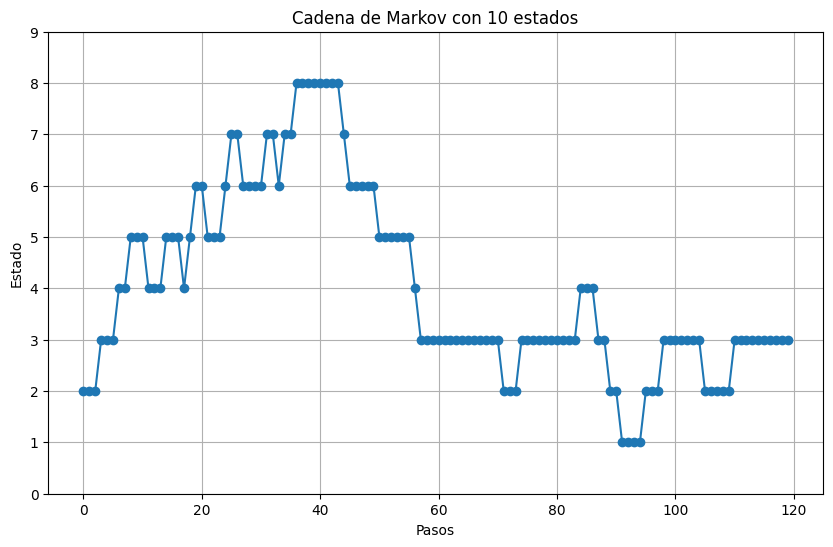

In [ ]:
import matplotlib.pyplot as plt

# Matriz de transición de la cadena de Markov
transitions = P

# Estado inicial
initial_state = np.array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

# Función para generar una secuencia de estados en la cadena de Markov
def generate_sequence(transitions, initial_state, num_steps):
    num_states = transitions.shape[0]
    sequence = []
    current_state = np.argmax(initial_state)
    sequence.append(current_state)
    
    for _ in range(num_steps):
        next_state = np.random.choice(range(num_states), p=transitions[current_state])
        current_state = next_state
        sequence.append(current_state)
    
    return sequence

# Generar una secuencia de 100 pasos en la cadena de Markov
sequence = generate_sequence(transitions, initial_state, 119)

# Graficar la secuencia
plt.figure(figsize=(10, 6))
plt.plot(sequence, marker='o')
plt.xlabel('Pasos')
plt.ylabel('Estado')
plt.title('Cadena de Markov con 10 estados')

plt.yticks(range(10))
plt.grid(True)
plt.show()